In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


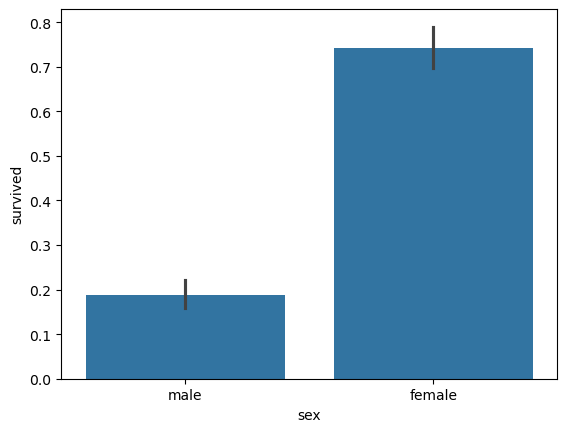

In [6]:
sns.barplot(data=df, x="sex", y="survived")
plt.show()

In [7]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

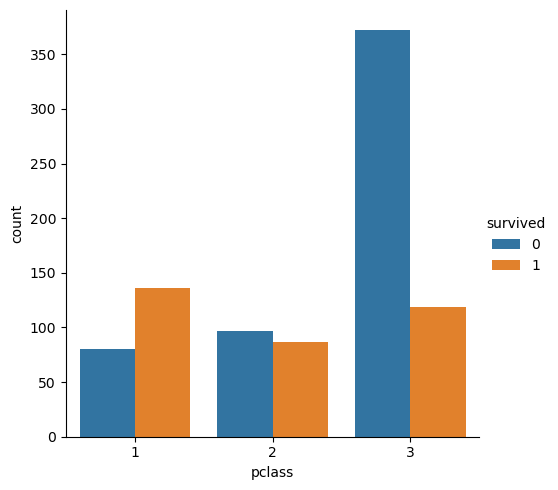

In [8]:
sns.catplot(data=df, x="pclass",hue="survived",kind="count")
plt.show()

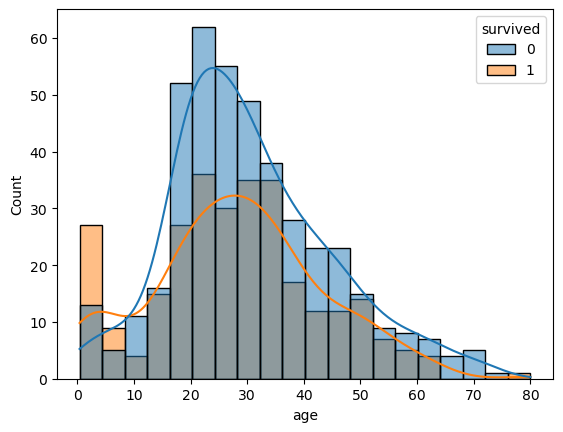

In [11]:
sns.histplot(data=df, x="age",hue="survived",kde=True)
plt.show()

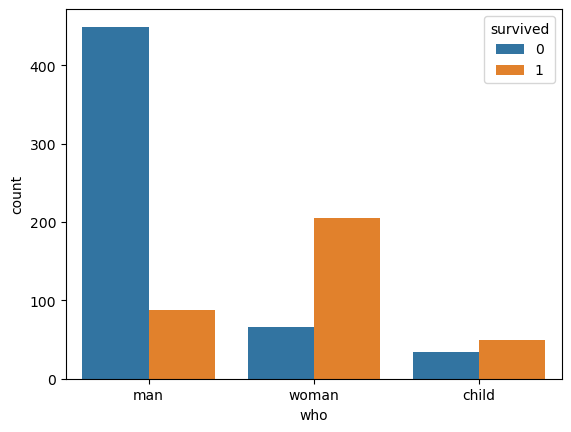

In [12]:
sns.countplot(data=df,x="who",hue="survived")
plt.show()

In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df = df.drop(["deck","embark_town","alive"],axis=1)

In [15]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [18]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [20]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [21]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [22]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [23]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [24]:
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [26]:
df["alone"]

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int32

In [27]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'class', 'who','embarked']

preprocessor = ColumnTransformer(transformers=
                                [
                                    ("cat",OneHotEncoder(drop="first",handle_unknown="ignore"),categorical_cols)
                                ],
                                 remainder="passthrough"
                                 )
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [31]:
encoded_cols = preprocessor.get_feature_names_out()

In [32]:
X_train = pd.DataFrame(X_train,columns=encoded_cols)
X_test = pd.DataFrame(X_test,columns=encoded_cols)

In [33]:
X_train

,cat__sex_male,cat__class_Second,cat__class_Third,cat__who_man,cat__who_woman,cat__embarked_Q,cat__embarked_S,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__adult_male,remainder__alone
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,27.0,0.0,0.0,7.8958,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,17.0,0.0,0.0,10.5000,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0
3,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,8.0500,1.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,43.0,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,28.0,0.0,0.0,7.8958,1.0,1.0
664,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,1.0
665,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48.0,1.0,0.0,76.7292,1.0,0.0
666,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,18.0,0.0,0.0,11.5000,1.0,1.0


In [34]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import lightgbm as lgb

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
clf = lgb.LGBMClassifier(verbosity=-1)
clf.fit(X_train,y_train)

LGBMClassifier(verbosity=-1)

In [38]:
y_pred = clf.predict(X_test)

In [39]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       128
           1       0.75      0.76      0.75        95

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  24]
 [ 23  72]]


In [44]:
importances = clf.feature_importances_

feature_names = X_train.columns
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [45]:
feat_importance

,Feature,Importance
11,remainder__fare,1132
8,remainder__age,865
6,cat__embarked_S,81
10,remainder__parch,77
9,remainder__sibsp,65
0,cat__sex_male,60
2,cat__class_Third,51
1,cat__class_Second,41
13,remainder__alone,41
4,cat__who_woman,36


In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
lgb_model = lgb.LGBMClassifier(verbosity=-1)

In [48]:
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [50]:
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

In [51]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [52]:
random_search.best_params_

{'subsample': 1.0,
 'num_leaves': 31,
 'n_estimators': 100,
 'min_child_samples': 5,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [53]:
y_pred = random_search.predict(X_test)

In [54]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       135
           1       0.75      0.82      0.78        88

    accuracy                           0.82       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.82      0.82       223

[[111  24]
 [ 16  72]]


In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [56]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       136
           1       0.72      0.79      0.75        87

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.80      0.80      0.80       223

[[109  27]
 [ 18  69]]


In [57]:
params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [58]:
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(n_estimators=100),
    param_distributions=params,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1, 0.3,
                                                             0.4],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [59]:
random_search.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [60]:
y_pred = random_search.predict(X_test)

In [61]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.78      0.77      0.78        97

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

[[105  21]
 [ 22  75]]
